# <font color='blue'>Multiple Linear Regression (Housing Case Study)</font>

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

#### Objective:
- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.
- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.
- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### We will perform the following steps:
1. **Data Understanding**
    - Importing the housing data file
    - Understanding the data 
    
2. **Data Cleaning**
    - Handling missing Values

3. **Exploratory Data Analysis**
   - Univariate Analysis
   - Bivariate Analysis

4. **Data Preparation**
   - Binary Variable conversion
   - Categorical Variables conversion
   - Performing test-train split
   - Feaure Scaling
   
5. **Model Building**
   - Model 1: using all the variables
   - Model Evaluation
   - Model 2
   - Model 3
   - Mode 4
   - Residual Analysis of the train data
   
6. **Making Predictions on test set Using the Final Model** 
7. **Model Evaluation**

# <font color='blue'>1. Reading and Understanding the data</font>

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read housing data
housing = pd.read_csv("Housing.csv")

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print("Housing dataset has {0} rows and {1} columns".format(housing.shape[0],housing.shape[1]));

Housing dataset has 545 rows and 13 columns


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# <font color='blue'>2. Data cleaning</font>

In [8]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There are no missing values

# <font color='blue'>3. Exploratory Data Analysis</font>

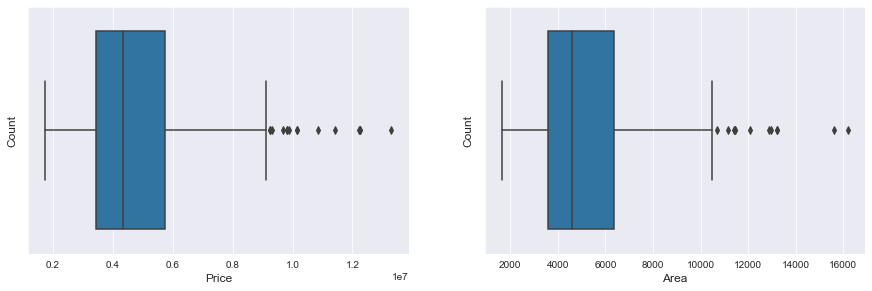

In [9]:
sns.set_style("darkgrid")

plt.figure(figsize=(15,10))
plt.subplot(2,2,1);
sns.boxplot(housing['price'])
plt.xlabel('Price',fontdict={'fontsize':12})
plt.ylabel("Count",fontdict={'fontsize':12})

plt.subplot(2,2,2);
sns.boxplot(housing['area'])
plt.xlabel('Area',fontdict={'fontsize':12})
plt.ylabel("Count",fontdict={'fontsize':12})
plt.show()

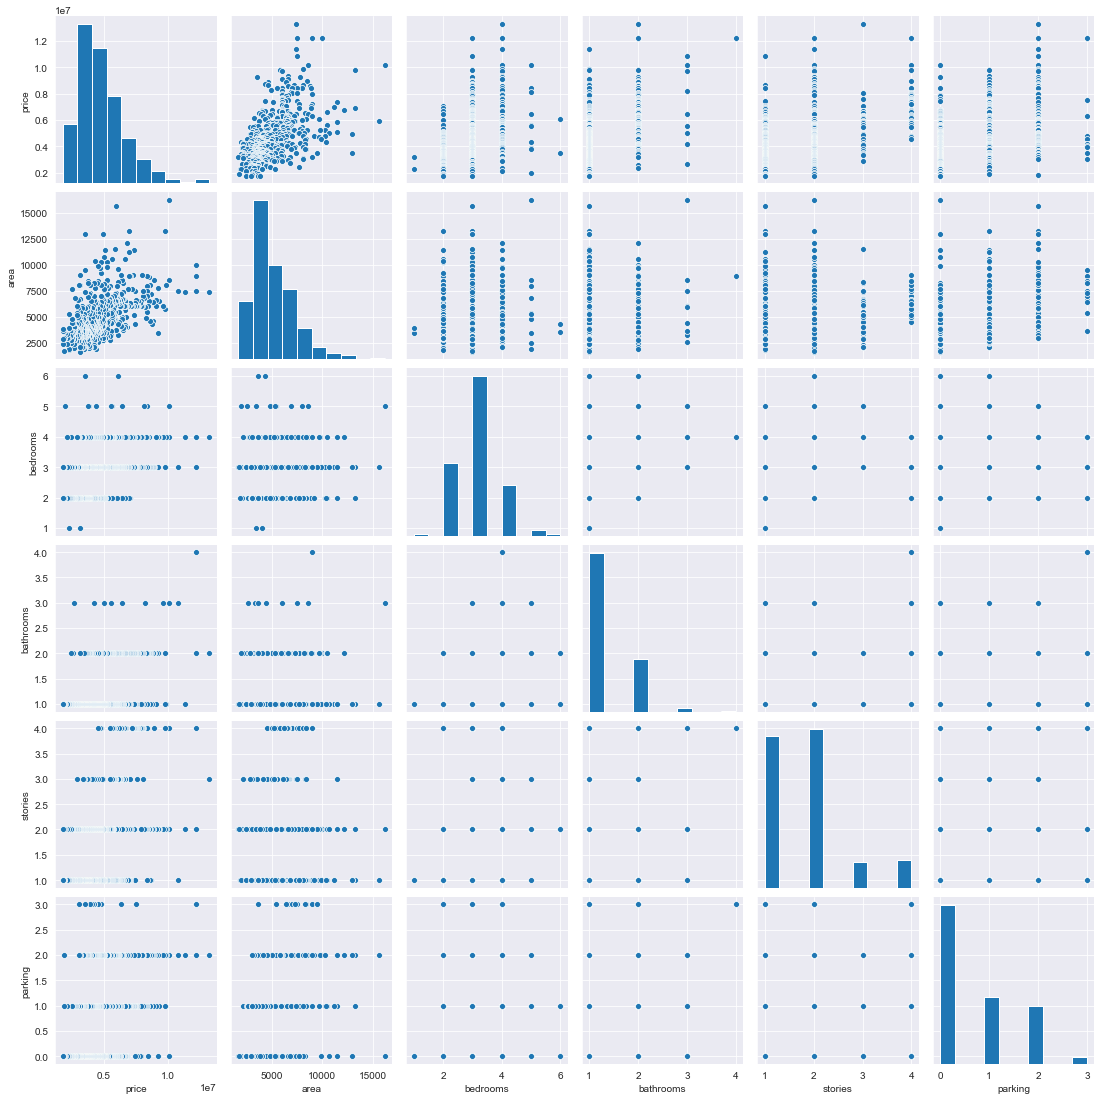

In [10]:
sns.pairplot(housing)
plt.show()

### INFERENCE
Yes we can consider a linear regression model as there are some variables that are positively corelated with price.

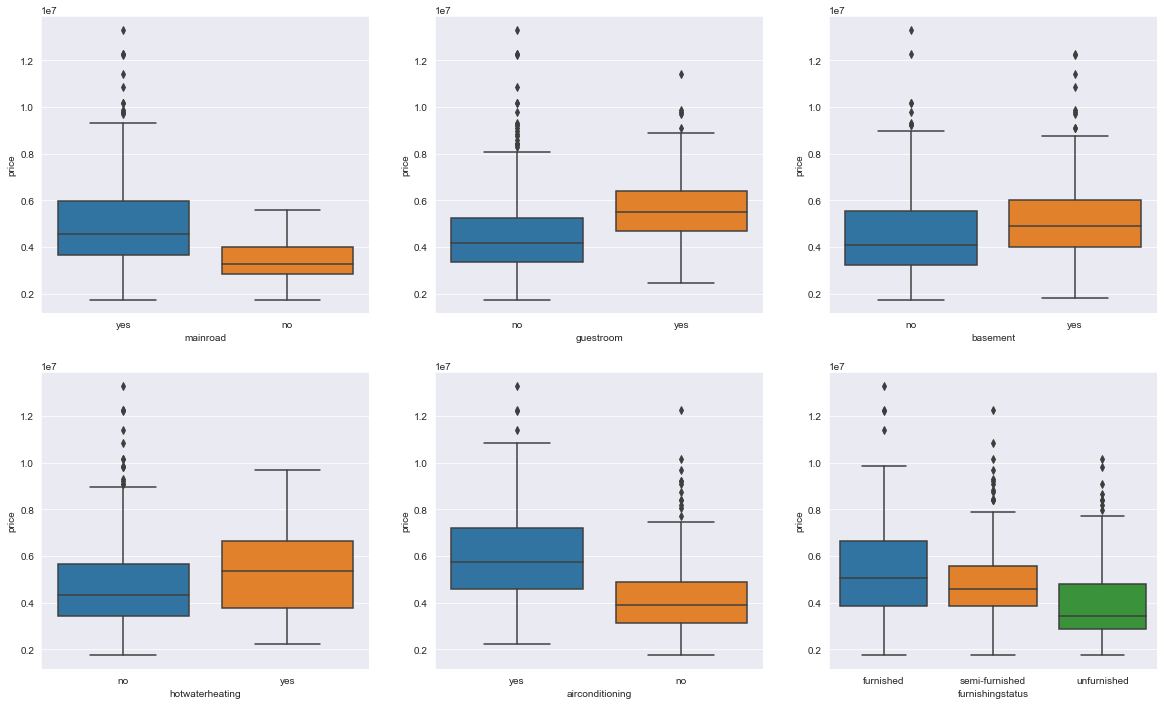

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

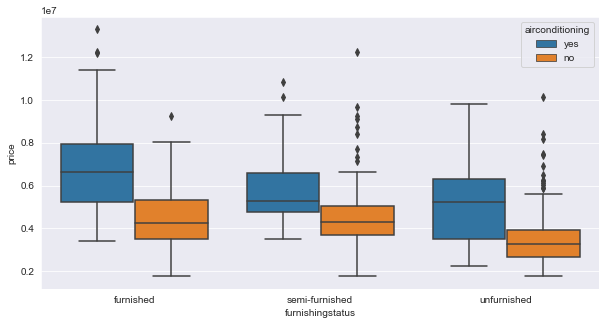

In [12]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

# <font color='blue'>4. Data Preparation</font>
- You can see that your dataset has many columns with values as 'Yes' or 'No'.
- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [13]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [14]:
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


#### Dummy Variables
The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [15]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [16]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [17]:
# Add the results to the original housing dataframe
housing = pd.concat([housing, status], axis = 1)

In [18]:
# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [19]:
# Drop 'furnishingstatus' as we have created the dummies for it
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [20]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Splitting the Data into Training and Testing Sets

In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features
For Simple Linear Regression, scaling doesn't impact the model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [24]:
# Applying the scaling on the test sets
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X and Y sets for the model building¶

In [25]:
y_train = df_train.pop('price')
X_train = df_train

# <font color='blue'>5. Model Building</font>

### Model 1: Using all the variables

In [26]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [27]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [28]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Wed, 19 May 2021   Prob (F-statistic):           8.83e-83
Time:                        11:42:09   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

Looking at the p-values, it seems like some of the variables aren't really significant (in the presence of other variables). Maybe we could drop some?
We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

#### Checking VIF

In [29]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


- We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

- As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `semi-furnished` as it has a very high p-value of 0.938. Let's go ahead and drop this variables

### Model 2

In [31]:
#Build a linear model

X = X_train.drop('semi-furnished', axis = 1)

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [32]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Wed, 19 May 2021   Prob (F-statistic):           1.07e-83
Time:                        11:42:10   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [33]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


- We can notice that some of the variable still have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

- We can observe that variable `bedroom` has a significantly high VIF (6.6) and a high p-value (0.206) as well. Hence, this variable isn't of much use and should be dropped.

### Model 3

In [34]:
X = X.drop('bedrooms', axis = 1)

In [35]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [36]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Wed, 19 May 2021   Prob (F-statistic):           2.73e-84
Time:                        11:42:10   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [37]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


We can observe that dropping `semi-furnised` decreased the VIF of `mainroad` as well such that it is now under 5. But from the summary, we can still see some of them have a high p-value like `basement`  has a p-value of 0.03. We should drop this variable as well.

### Model 4

In [38]:
X = X.drop('basement', axis = 1)

In [39]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [41]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Wed, 19 May 2021   Prob (F-statistic):           3.13e-84
Time:                        11:42:57   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

In [42]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model

### Residual Analysis of the train data
Now we will check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [44]:
y_train_price_pred = lr_4.predict(X_train_lm)

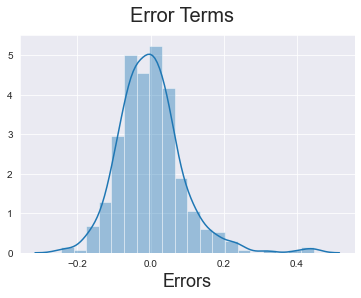

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

# <font color='blue'>6. Making Predictions on test set using the Final Model</font>

In [47]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


#### Dividing into X_test and y_test

In [48]:
y_test = df_test.pop('price')
X_test = df_test

In [50]:
X_test.drop(["bedrooms", "semi-furnished", "basement"], axis = 1,inplace = True)

In [51]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [ ]:
# Making predictions using the fourth model
y_pred_m4 = lr_4.predict(X_test_m4)

# <font color='blue'>7. Model Evaluation</font>

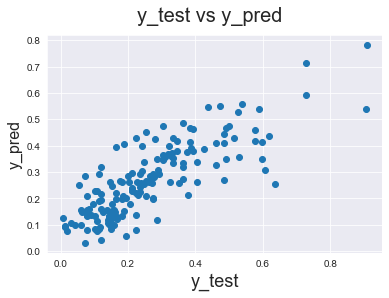

In [54]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [58]:
print(lr_4.params)

const              0.042792
area               0.233517
bathrooms          0.201857
stories            0.108139
mainroad           0.049672
guestroom          0.040198
hotwaterheating    0.087618
airconditioning    0.068221
parking            0.062854
prefarea           0.063745
unfurnished       -0.033699
dtype: float64



We can see that the equation of our best fitted line is:

$ price = 0.23  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $

Overall we have a decent model, but we also acknowledge that we could do better. 
We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model
3. Use RFE for feature selection